In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import os
import time

import numpy as np
from skimage.transform import resize

sys.path.appensd(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *
from metadata import *

/home/yuncong/MouseBrainAtlas/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtuale

Setting environment for Precision WorkStation
{'MD585': 0.46}


No vtk
Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD594 anchor: ini file /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/MD594/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/MD594/MD594_sorted_filenames.txt
Failed to cache MD594 sections_to_filenames: 
File does not exist: /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/MD594/MD594_sorted_filenames.txt
Failed to cache MD594 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD594 section_limits: ini file /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/MD594/MD594_prep2_sectionLimits.ini does not exist.
No anchor.txt is found

In [3]:
planar_resolution

{'MD585': 0.46}

In [5]:
metadata_cache['section_limits']

{}

In [6]:
# output_resolution = 'down32'
output_resolution = '10.0um'

# tb_version = 'NtbNormalized'
# tb_version = None
tb_version = 'NtbNormalizedAdaptiveInvertedGamma'
tb_resol = 'thumbnail'

In [43]:
# for stack in ['CHATM2']:
# for stack in ['MD661']:
for stack in ['DEMO998']:

    images = {}

#     for sec in metadata_cache['valid_sections_all'][stack]:
    for sec in metadata_cache['valid_sections'][stack]:

        img_rgb = DataManager.load_image_v2(stack, section=sec, 
                                            resol=tb_resol, 
                                            prep_id='alignedWithMargin', 
                                            version=tb_version)
        img = img_as_ubyte(rgb2gray(img_rgb)) # Use greylevel

        mask = DataManager.load_image_v2(stack=stack, section=sec, 
                                         prep_id='alignedWithMargin', 
                                         resol=tb_resol, 
                                         version='mask')
        img[~mask] = 0

        images[sec] = img

    # Specify isotropic resolution of the output volume.
    voxel_size_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)

    input_image_resolution_um = convert_resolution_string_to_um(resolution=tb_resol, stack=stack)

    volume_outVolResol, volume_origin_wrt_wholebrainWithMargin_outVolResol = images_to_volume_v2(images=images, 
                                                spacing_um=20.,
                                                in_resol_um=input_image_resolution_um,
                                                out_resol_um=voxel_size_um)
    print volume_outVolResol.shape
    
    ##############################################################
    
    prep5_origin_wrt_prep1_tbResol = DataManager.load_cropbox_v2(stack=stack, only_2d=True, prep_id='alignedWithMargin')

    loaded_cropbox_resol = 'thumbnail'

    prep5_origin_wrt_prep1_outVolResol = prep5_origin_wrt_prep1_tbResol * \
    convert_resolution_string_to_um(resolution=loaded_cropbox_resol, stack=stack) / voxel_size_um

    wholebrainWithMargin_origin_wrt_wholebrain_outVolResol = np.r_[np.round(prep5_origin_wrt_prep1_outVolResol).astype(np.int)[[0,2]], 0]
    # wholebrainWithMargin_origin_wrt_wholebrain = np.array([0,0,0])

    volume_origin_wrt_wholebrain_outVolResol = volume_origin_wrt_wholebrainWithMargin_outVolResol + wholebrainWithMargin_origin_wrt_wholebrain_outVolResol

    ########################################

    stack_spec = dict(name=stack,
                      resolution=output_resolution,
                      prep_id='wholebrainWithMargin',
                      vol_type='intensity')
    
    save_data(volume_outVolResol, 
              fp=DataManager.get_original_volume_filepath_v2(stack_spec=stack_spec, structure=None))

    save_data(volume_origin_wrt_wholebrain_outVolResol, 
              fp=DataManager.get_original_volume_origin_filepath_v3(stack_spec=stack_spec, structure=None))

Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep5_thumbnail_NtbNormalizedAdaptiveInvertedGamma.tif
Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep5_thumbnail_mask/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep5_thumbnail_mask.png
File not on local disk. Download from S3.
cv2.imread fails to load. Try skimage.imread.
skimage.imread fails to load.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Instead, try loading raw and then downscale...
Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep5_raw_mask/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep5_raw_mask.png
File not on local disk. Download from S3.
cv2.imread fails to load. Try skimage.imread.
skimage.imread fails to loa

(729, 1663, 23)


No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.


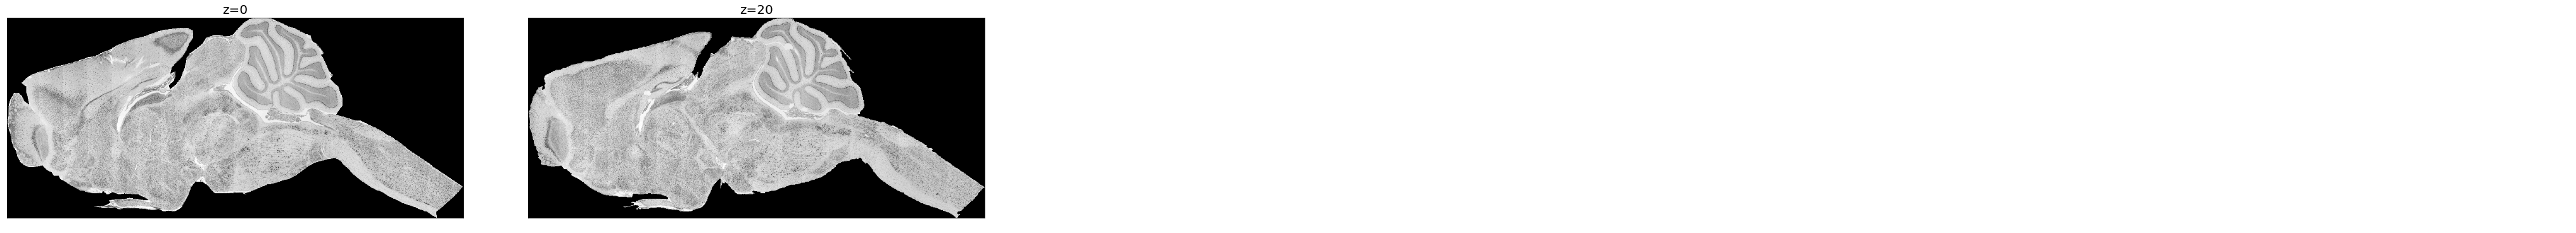

In [32]:
display_volume_sections(volume_outVolResol, cmap=plt.cm.gray, every=20, title_fontsize=20)

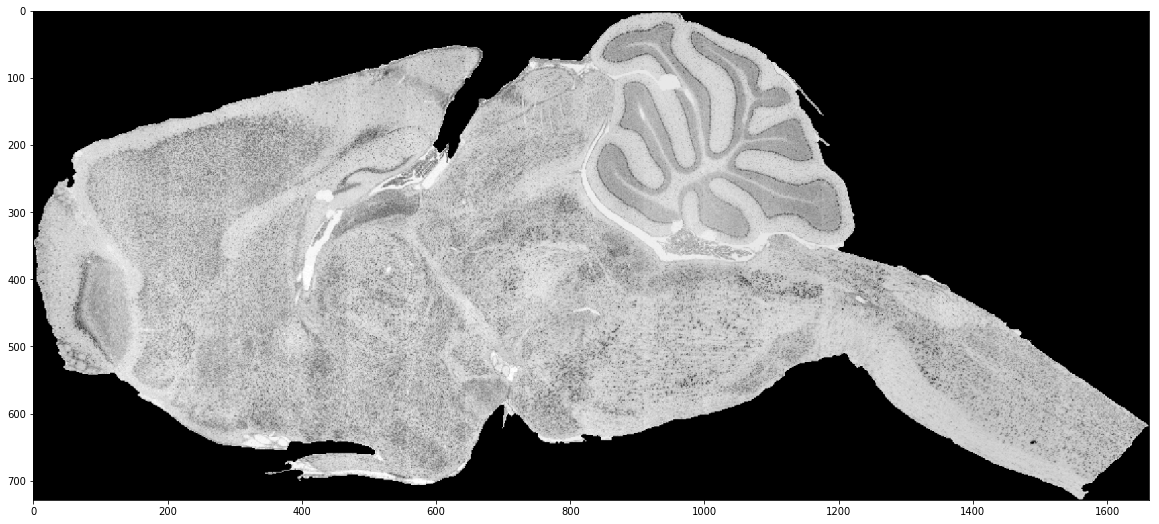

In [42]:
plt.figure(figsize=(20,20));
plt.imshow(volume_outVolResol[..., 20], plt.cm.gray);